In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Algorithms to use
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# To supress warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# loading dataset
dataset = pd.read_csv('MLDM Task1 Cryotherapy.csv')

In [4]:
# Checking the number of rows and columns in the data
dataset.shape

(90, 7)

**Observations:**
* There are **90 observations and 7 columns** in the dataset.

### **Data Overview**

In [5]:
# Let's view the first 5 rows of the data
dataset.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [6]:
# Let's check the data types of the columns in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


**Observations:**
* There are no missing values in the dataset.
* All columns are of numerical values, 6 are type integer and 1 of type float.
* sex, Type and Result_of_Treatment have numerical values, however they are norminal signifying categories

In [7]:
cartegorical_columns=['sex','Type','Result_of_Treatment']
numerical_columns=['age','Time','Number_of_Warts','Area']

### **Descriptive overview of numerical columns**

In [8]:
dataset[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,90.0,28.600000,13.360852,15.00,18.0000,25.5,35.0000,67.0
Time,90.0,7.666667,3.406661,0.25,4.5625,8.5,10.6875,12.0
Number_of_Warts,90.0,5.511111,3.567155,1.00,2.0000,5.0,8.0000,12.0
Area,90.0,85.833333,131.733153,4.00,20.0000,70.0,100.0000,750.0


**Observations:**
* **age:** Average age is 28 years and it has a wide range from 15 to 67 years.
* **Time:** the average time is 7 hours it has a  range with a minimum of quarter hour and a maximum of 12 hours.
* **Number_of_Warts:** Average Number_of_Warts is 5 it has a  range with a minimum of 1 and a maximum of 12.
* **Area:** Average Area is 85 it has a wide range from 4 to 750 years

### **Descriptive overview  for categorical variables**

In [9]:
for i in cartegorical_columns:
    cartegory_value_count = dataset[i].value_counts()
    print(f'Cartegory value counts for: {i}')
    print(cartegory_value_count)

Cartegory value counts for: sex
1    47
2    43
Name: sex, dtype: int64
Cartegory value counts for: Type
1    54
3    27
2     9
Name: Type, dtype: int64
Cartegory value counts for: Result_of_Treatment
1    48
0    42
Name: Result_of_Treatment, dtype: int64


**Observations:**
* **sex:** sex has 47 observation in 1 cartegory, 43 observation in 2 cartegory.
* **Type:** Type has 54 observation in 1 cartegory, 9 observation in 2 cartegory,and 27 observation in 3 cartegory
* **Result_of_Treatment:** Result_of_Treatment has 48 observation in 1 cartegory, 42 observation in 2 cartegory

## **Exploratory Data Analysis**
#### **Univariate analysis**
Let's explore these variables in some more depth by observing their distributions

## Numerical 

#### **age:**

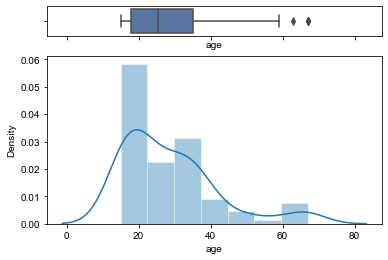

In [10]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(dataset["age"], ax=ax_box)
sns.distplot(dataset["age"], ax=ax_hist)
ax_box.set(xlabel='age')
plt.show()

**Observations:**
* The distribution of age is skewed to the right.
* From the boxplot, it contains some outliers.

#### **Time:**

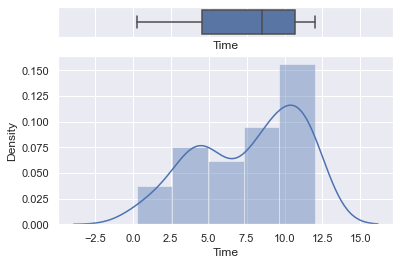

In [11]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(dataset["Time"], ax=ax_box)
sns.distplot(dataset["Time"], ax=ax_hist)
ax_box.set(xlabel='Time')
plt.show()

**Observations:**
* The distribution of Time is slightly skewed to the left.
* From the boxplot, it contains no outliers.

#### **Number_of_Warts:**

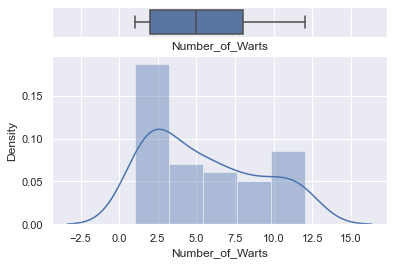

In [12]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(dataset["Number_of_Warts"], ax=ax_box)
sns.distplot(dataset["Number_of_Warts"], ax=ax_hist)
ax_box.set(xlabel='Number_of_Warts')
plt.show()

**Observations:**
* The distribution of Number_of_Warts is slightly skewed to the right.
* From the boxplot, it contains no outliers.

#### **Area:**

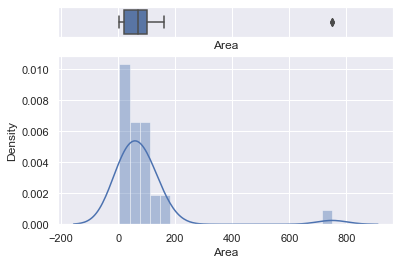

In [13]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(dataset["Area"], ax=ax_box)
sns.distplot(dataset["Area"], ax=ax_hist)
ax_box.set(xlabel='Area')
plt.show()

**Observations:**
* Area is normally distributed but slightly skewed to the right.
* From the boxplot, it contains large outliers value.

## Cartegorical (Norminal)

### sex:

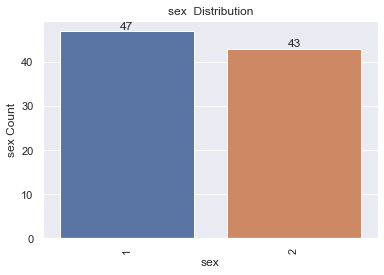

In [14]:
ax=sns.countplot(x=dataset['sex'])
ax.bar_label(ax.containers[0])
plt.title('sex  Distribution')
plt.xlabel('sex')
plt.ylabel('sex Count')
plt.xticks(rotation = 90);
plt.show()

In [15]:
### Type:

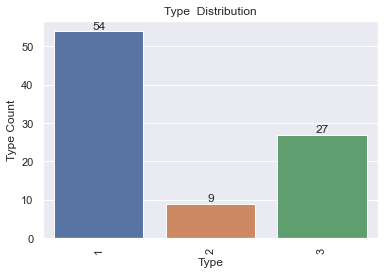

In [16]:
ax=sns.countplot(x=dataset['Type'])
ax.bar_label(ax.containers[0])
plt.title('Type  Distribution')
plt.xlabel('Type')
plt.ylabel('Type Count')
plt.xticks(rotation = 90);
plt.show()

In [17]:
### Result_of_Treatment:

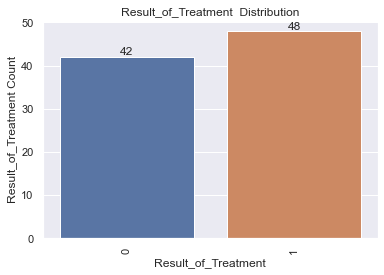

In [18]:
ax=sns.countplot(x=dataset['Result_of_Treatment'])
ax.bar_label(ax.containers[0])
plt.title('Result_of_Treatment  Distribution')
plt.xlabel('Result_of_Treatment')
plt.ylabel('Result_of_Treatment Count')
plt.xticks(rotation = 90);
plt.show()

## **Bivariate Analysis**

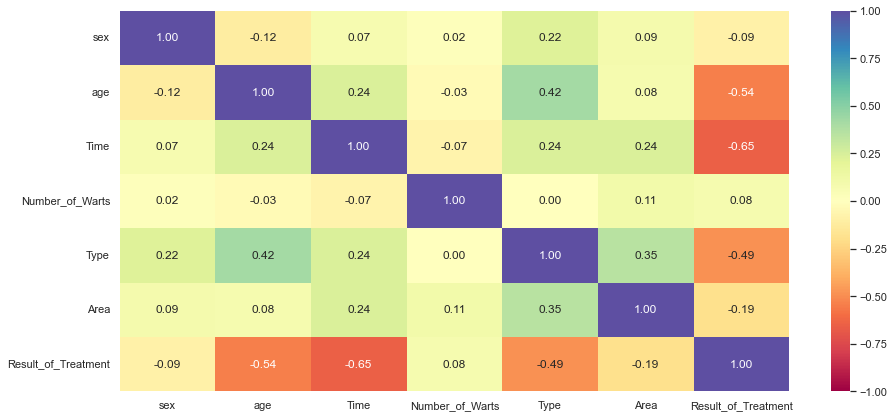

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* **Result_of_Treatment** shows a bit of a negative correlation with **sex, 	age, Time, Type** and **Area** .
* There's a strong positive correlation between **age** and **Type**, **Area** and **Type**.


## **Separate the independent variables (X) and the dependent variable (Y)**

In [20]:
X = dataset.drop(["Result_of_Treatment"], axis=1)
y = dataset["Result_of_Treatment"]

## Feature Scaling 

In [21]:

scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns.tolist())

**Splitting the data into 80% train and 20% test set**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)

In [23]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the models**

Building 2 different models:

- **Support Vector Machine**
- **Neural Network**



## SVM

In [49]:
# Linear kernal or linear decision boundary
svm = SVC(kernel='linear') 
model = svm.fit(X= X_train, y = y_train)


              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.97      0.84      0.90        38

    accuracy                           0.90        72
   macro avg       0.91      0.91      0.90        72
weighted avg       0.91      0.90      0.90        72



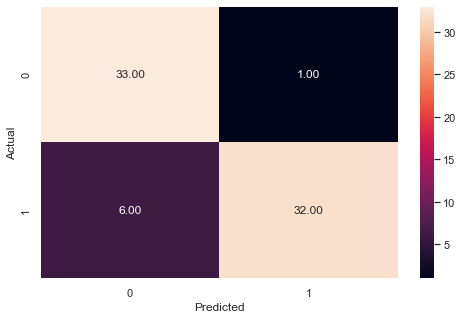

In [43]:
y_pred_train_svm = model.predict(X_train)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.80      0.89        10

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



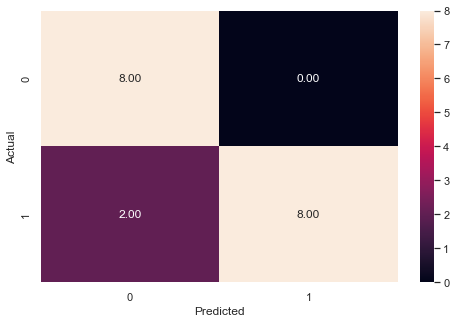

In [44]:
y_pred_test_svm = model.predict(X_test)

metrics_score(y_test, y_pred_test_svm)

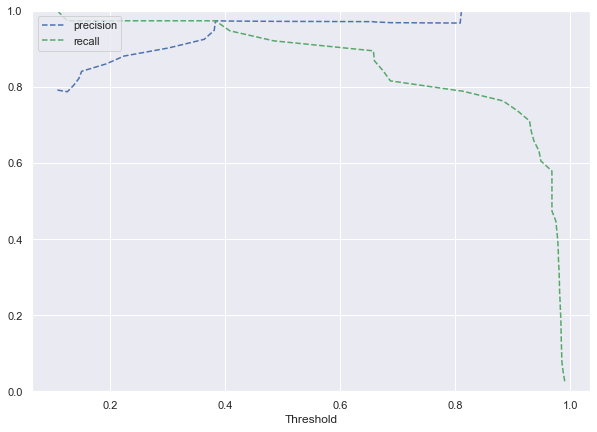

In [45]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.97      0.96        38

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



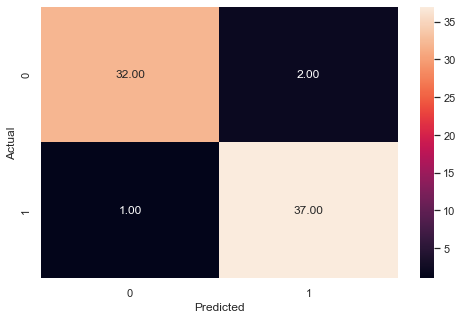

In [47]:
optimal_threshold_svm=.38
y_pred_train = svm_rbf.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



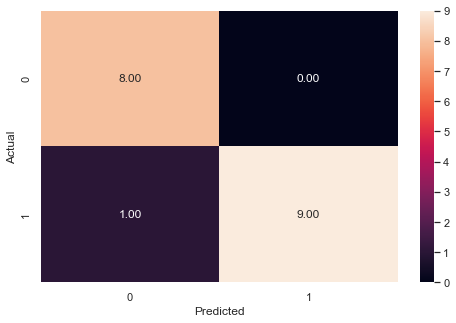

In [48]:
optimal_threshold_svm=.38
y_pred_test = svm_rbf.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

### **NEURAL NETWORK**

In [147]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

**Let's build a feed forward neural network with 2 hidden layers and the output layer.**

In [148]:
# # We will be adding the layers sequentially
nn_model = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
nn_model.add(Dense(128, activation='relu', input_shape=(6,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
nn_model.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
nn_model.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
nn_model.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function  
nn_model.add(Dense(1, activation='sigmoid'))

In [149]:
nn_model.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [150]:
nn_model_history = nn_model.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
2/2 - 1s - loss: 0.6872 - accuracy: 0.4531 - val_loss: 0.6420 - val_accuracy: 0.6250 - 622ms/epoch - 311ms/step
Epoch 2/150
2/2 - 0s - loss: 0.6810 - accuracy: 0.4844 - val_loss: 0.6420 - val_accuracy: 0.7500 - 25ms/epoch - 12ms/step
Epoch 3/150
2/2 - 0s - loss: 0.6722 - accuracy: 0.4688 - val_loss: 0.6417 - val_accuracy: 0.7500 - 44ms/epoch - 22ms/step
Epoch 4/150
2/2 - 0s - loss: 0.6656 - accuracy: 0.5781 - val_loss: 0.6419 - val_accuracy: 0.7500 - 31ms/epoch - 16ms/step
Epoch 5/150
2/2 - 0s - loss: 0.6492 - accuracy: 0.6094 - val_loss: 0.6403 - val_accuracy: 0.7500 - 30ms/epoch - 15ms/step
Epoch 6/150
2/2 - 0s - loss: 0.6530 - accuracy: 0.5781 - val_loss: 0.6390 - val_accuracy: 0.7500 - 47ms/epoch - 23ms/step
Epoch 7/150
2/2 - 0s - loss: 0.6527 - accuracy: 0.6719 - val_loss: 0.6385 - val_accuracy: 0.7500 - 25ms/epoch - 13ms/step
Epoch 8/150
2/2 - 0s - loss: 0.6360 - accuracy: 0.7656 - val_loss: 0.6377 - val_accuracy: 0.7500 - 26ms/epoch - 13ms/step
Epoch 9/150
2/2 - 0s -

### **Plotting Accuracy vs Epoch Curve**

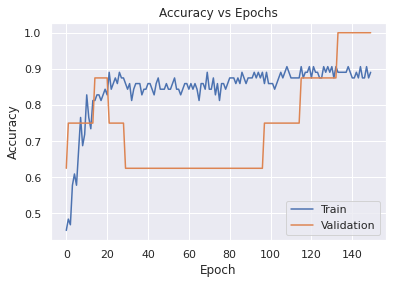

In [151]:
plt.plot(nn_model_history.history['accuracy'])
plt.plot(nn_model_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [152]:
nn_model.evaluate(X_train, y_train, verbose = 1)
train_pred = np.round(nn_model.predict(X_train))

3/3 [==============================] - 0s 3ms/step


In [153]:
nn_model.evaluate(X_test, y_test, verbose = 1)
test_pred = np.round(nn_model.predict(X_test))

1/1 [==============================] - 0s 17ms/step


              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.97      0.87      0.92        38

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72



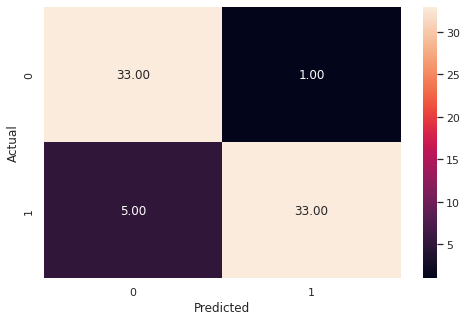

In [154]:
metrics_score(y_train, train_pred)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



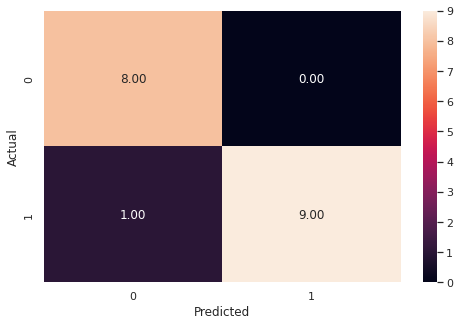

In [155]:
metrics_score(y_test, test_pred)

In [156]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()